# Условие задачи

![](./task.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [ ]:
Θ_0 = 2
φ_0 = 0

/var/folders/1b/q1y_s5t17t916wl15hlyx8gm0000gn/T/ipykernel_9167/780817384.py:30: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(equation, y)


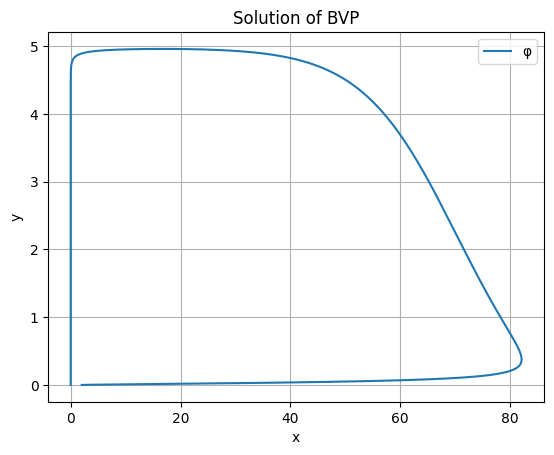

In [9]:
def equation1(Θ, φ):
    dΘdt = (2*Θ**2)/(3+Θ) - 0.05*Θ - 5*Θ*φ 
    return dΘdt

def equation2(Θ, φ):
    dφdt = 0.0015*Θ*(1 - φ/5)*(1+(φ/0.0525)**2) - 0.35*φ
    return dφdt

def f(y):
    y1, y2 = y
    return np.array([equation1(y1, y2), equation2(y1, y2)])

def rkstep1(y, h, f):
    k1 = f(y)
    k2 = f(y + 0.5*h*k1)
    k3 = f(y + 0.5*h*k2)
    k4 = f(y + h*k3)
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def rkstep2(y, h):
    def equation(z):
        return z - y - h * f(z)
    return fsolve(equation, y)

def rksolve(y_0, x_values, h):
    y_values = [y_0]

    for i in range(len(x_values) - 1):
        y_next = rkstep2(y_values[i], h)
        y_values.append(y_next)

    return np.array(y_values)

# Генерируем сетку значений x
x_0 = 0.0
x_n = 200
h = 0.00001 # 1e-5
x_values = np.arange(x_0, x_n + h, h)

# Решаем систему уравнений методом неявного Рунге-Кутты
y_0 = np.array([Θ_0, φ_0])
y_values = rksolve(y_0, x_values, h)

# Извлекаем значения Θ и φ
Θ_values = y_values[:, 0]
φ_values = y_values[:, 1]

#plt.plot(x_values, Θ_values, label='Θ')
plt.plot(Θ_values, φ_values, label='φ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of BVP')
plt.legend()
plt.grid(True)
plt.show()


Метод Рунге-Кутты основан на аппроксимации искомой функции у(х) в пределах каждого шага многочленом, который получен при помощи разложения функции у(х) в окрестности шага h каждой i-ой точки в ряд Тейлора, при этом отбрасывая правые члены ряда, при этом получая разные точности.